In [143]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import pi

#defining the one-pole Sellmeier equation for KTP
#format - mat20 = [A,B,C,D]

def n20(mat20,l): #l is in microns
    A = mat20[0]; B = mat20[1]; C = mat20[2]; D = mat20[3]
    u = A + (B/(1-(C/l)**2)) - D*(l**2)
    return np.sqrt(u)

T0 = 20; l0 = 0.515 #microns

#defining the Sellmeier constants for KTP  @ 20 deg. C

n20_y = [2.1518,0.87862,0.21801,0.01327]
n20_z = [2.3136,1.00012,0.23831,0.01679]

#defining the temperature gradient correction
#format - matT = [A,B,C,D]

def dn(matT,l): #l is in microns
    A = matT[0]; B = matT[1]; C = matT[2]; D = matT[3]
    return (A/(l**3) + B/(l**2) + C/l + D)*(1e-06)

#defining the temperature coefficients for KTP

nT_y = [4.269,-14.761,21.232,-2.113]
nT_z = [12.415,-44.414,59.129,-12.101]

#defining the corrected refractive indices at 80 deg C

T = 80; dT = T-T0

n1 = lambda l : n20(n20_y,l) + (dn(nT_y,l))*(dT) #ny(T,l)
n2 = lambda l : n20(n20_y,2*l) + (dn(nT_y,2*l))*(dT) #ny(T,2l)
n3 = lambda l : n20(n20_z,2*l) + (dn(nT_z,2*l))*(dT) #nz(T,2l)

# QPM Grating Period formula

v = (2*l0)/(2*n1(l0) - n2(l0) - n3(l0))
kv = (2*pi)/v

print("The grating period of KTP at 80 deg. Celcius is " 
        + str(round(v,3)) + " microns.")







The grating period of KTP at 80 deg. Celcius is 114.864 microns.


The spectral acceptance bandwidth is 0.46 nm.


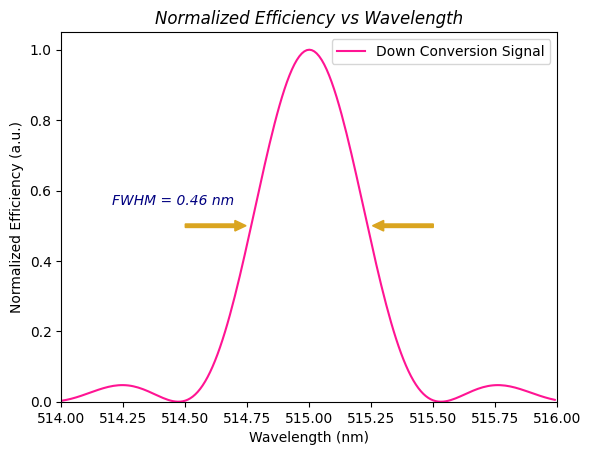

In [144]:
#To get the spectral acceptance bandwidth

def dk(l):
    return (2*pi)*(n1(l)/l - (0.5*n2(l))/l - (0.5*n3(l))/l) - kv

L = 5000 #microns

def I(l): #I/Io
    w = (np.sin(dk(l/1000)*L*0.5))/(dk(l/1000)*L*0.5)
    return (w**2)

X = np.arange(514,516,0.01)
Y = I(X)

l_max = X[np.argmax(Y)] #this is basically l0 = 0.515 microns
HM = 0.5*Y[np.argmax(Y)]
half_values = np.where(Y>=HM)[0]
FWHM = X[half_values[-1]] - X[half_values[0]] #this is the FWHM (degrees)

print("The spectral acceptance bandwidth is " 
        + str(round(FWHM,3)) + " nm.")

plt.plot(X,Y,color='deeppink',label='Down Conversion Signal')
plt.xlim(514,516)
plt.ylim(0, 1.05)


plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Efficiency (a.u.)')
plt.title('Normalized Efficiency vs Wavelength', fontstyle = 'italic')

plt.arrow(514.5,HM, X[half_values[0]] - 514.57,0,
        width = 0.01,color='goldenrod')
plt.arrow(X[half_values[-1]] + X[half_values[0]] - 514.5,HM,
        514.57-X[half_values[0]],0,width = 0.01,color='goldenrod')

fig = plt.gcf()
fig.text(0.3, 0.52, 'FWHM = ' + str(round(FWHM,2)) + " nm", 
        ha='center',fontstyle = 'italic',color = 'navy')



plt.legend()



plt.show()